In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from pandas_datareader import data

In [79]:
pop = pd.read_csv('state-population.csv') 
areas = pd.read_csv('state-areas.csv') 
abbrevs = pd.read_csv('state-abbrevs.csv')


In [80]:
print(pop)

     state/region     ages  year   population
0              AL  under18  2012    1117489.0
1              AL    total  2012    4817528.0
2              AL  under18  2010    1130966.0
3              AL    total  2010    4785570.0
4              AL  under18  2011    1125763.0
...           ...      ...   ...          ...
2539          USA    total  2010  309326295.0
2540          USA  under18  2011   73902222.0
2541          USA    total  2011  311582564.0
2542          USA  under18  2012   73708179.0
2543          USA    total  2012  313873685.0

[2544 rows x 4 columns]


In [81]:
 print(areas)

                   state  area (sq. mi)
0                Alabama          52423
1                 Alaska         656425
2                Arizona         114006
3               Arkansas          53182
4             California         163707
5               Colorado         104100
6            Connecticut           5544
7               Delaware           1954
8                Florida          65758
9                Georgia          59441
10                Hawaii          10932
11                 Idaho          83574
12              Illinois          57918
13               Indiana          36420
14                  Iowa          56276
15                Kansas          82282
16              Kentucky          40411
17             Louisiana          51843
18                 Maine          35387
19              Maryland          12407
20         Massachusetts          10555
21              Michigan          96810
22             Minnesota          86943
23           Mississippi          48434


In [82]:
print(abbrevs)

                   state abbreviation
0                Alabama           AL
1                 Alaska           AK
2                Arizona           AZ
3               Arkansas           AR
4             California           CA
5               Colorado           CO
6            Connecticut           CT
7               Delaware           DE
8   District of Columbia           DC
9                Florida           FL
10               Georgia           GA
11                Hawaii           HI
12                 Idaho           ID
13              Illinois           IL
14               Indiana           IN
15                  Iowa           IA
16                Kansas           KS
17              Kentucky           KY
18             Louisiana           LA
19                 Maine           ME
20               Montana           MT
21              Nebraska           NE
22                Nevada           NV
23         New Hampshire           NH
24            New Jersey           NJ
25          

In [83]:
merged = pd.merge(pop, abbrevs,how='inner',
                  left_on='state/region', right_on='abbreviation')
# drop duplicate info 
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,WY
2444,WY,total,1991,459260.0,Wyoming,WY
2445,WY,under18,1991,136720.0,Wyoming,WY
2446,WY,under18,1990,136078.0,Wyoming,WY


In [84]:
merged.stack()

0     state/region           AL
      ages              under18
      year                 2012
      population      1117489.0
      state             Alabama
                        ...    
2447  ages                total
      year                 1990
      population       453690.0
      state             Wyoming
      abbreviation           WY
Length: 14688, dtype: object

In [85]:
merged = merged.drop('abbreviation', 1) 

C:\Users\MUZAMM~1\AppData\Local\Temp/ipykernel_6164/431581161.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = merged.drop('abbreviation', 1)


In [86]:
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming
2444,WY,total,1991,459260.0,Wyoming
2445,WY,under18,1991,136720.0,Wyoming
2446,WY,under18,1990,136078.0,Wyoming


In [87]:
merged[merged['population'].isnull()]

,state/region,ages,year,population,state


In [88]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array([], dtype=object)

In [89]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico' 
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States' 
merged.isnull().any()

state/region    False
ages            False
year            False
population      False
state           False
dtype: bool

In [90]:
#merged.loc[merged['names'] == 'ali', 'marks'] = '80' 
#merged.loc[merged['names'] == 'ahmad', 'marks'] = '70' 
#merged.isnull().any()

In [91]:
final=pd.merge(merged, areas, on='state', how='left')

In [92]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [93]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array([], dtype=object)

In [94]:
#We can compute the same result via pd.eval by constructing the expression as a 
#string:
#eval() child object of pandas
#It cannot be expressed using the Data 
#Frame.eval() syntax, however! Instead, for this type of filtering operation, you can 
#use the query() method:
#In[24]: result2 = df.query('A < 0.5 and B < 0.5') 
#np.allclose(result1, result2)
    

In [95]:
final = pd.merge(merged, areas, on='state', how='left') 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423


In [96]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [97]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array([], dtype=object)

In [98]:
data2010 = final.query("year == 2010 & ages == 'total'") 
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423
91,AK,total,2010,713868.0,Alaska,656425
101,AZ,total,2010,6408790.0,Arizona,114006
189,AR,total,2010,2922280.0,Arkansas,53182
197,CA,total,2010,37333601.0,California,163707


In [99]:
data2010.set_index('state', inplace=True)


In [100]:
density = data2010['population'] / data2010['area (sq. mi)'] 
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
dtype: float64

In [101]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [102]:
data2010

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423
Alaska,AK,total,2010,713868.0,656425
Arizona,AZ,total,2010,6408790.0,114006
Arkansas,AR,total,2010,2922280.0,53182
California,CA,total,2010,37333601.0,163707
Colorado,CO,total,2010,5048196.0,104100
Connecticut,CT,total,2010,3579210.0,5544
Delaware,DE,total,2010,899711.0,1954
District of Columbia,DC,total,2010,605125.0,68


In [103]:
# df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
#                     'rank': [1, 2, 3, 4]})

In [104]:
#df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
#                    'rank': [3, 1, 4, 2]})

In [105]:
#print(pd.merge(df8, df9, on="name"))

In [106]:
#print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

In [107]:
#print(pd.merge(df8, df9, on="name", prefixes=["_L", "_R"]))

In [108]:
#import seaborn as sns
#planets = sns.load_dataset('planets') 
#planets.shape

In [109]:
#import sklearn as sk
#sk.preprossers.OutlotEncoder()

In [110]:
print(data2010)

                     state/region   ages  year  population  area (sq. mi)
state                                                                    
Alabama                        AL  total  2010   4785570.0          52423
Alaska                         AK  total  2010    713868.0         656425
Arizona                        AZ  total  2010   6408790.0         114006
Arkansas                       AR  total  2010   2922280.0          53182
California                     CA  total  2010  37333601.0         163707
Colorado                       CO  total  2010   5048196.0         104100
Connecticut                    CT  total  2010   3579210.0           5544
Delaware                       DE  total  2010    899711.0           1954
District of Columbia           DC  total  2010    605125.0             68
Florida                        FL  total  2010  18846054.0          65758
Georgia                        GA  total  2010   9713248.0          59441
Hawaii                         HI  tot

In [111]:
data2010

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423
Alaska,AK,total,2010,713868.0,656425
Arizona,AZ,total,2010,6408790.0,114006
Arkansas,AR,total,2010,2922280.0,53182
California,CA,total,2010,37333601.0,163707
Colorado,CO,total,2010,5048196.0,104100
Connecticut,CT,total,2010,3579210.0,5544
Delaware,DE,total,2010,899711.0,1954
District of Columbia,DC,total,2010,605125.0,68


In [112]:
data2010=data2010.groupby(['year','state/region']).sum('population')

In [113]:
data2010

population  area (sq. mi)
year state/region                           
2010 AK              713868.0         656425
     AL             4785570.0          52423
     AR             2922280.0          53182
     AZ             6408790.0         114006
     CA            37333601.0         163707
     CO             5048196.0         104100
     CT             3579210.0           5544
     DC              605125.0             68
     DE              899711.0           1954
     FL            18846054.0          65758
     GA             9713248.0          59441
     HI             1363731.0          10932
     IA             3050314.0          56276
     ID             1570718.0          83574
     IL            12839695.0          57918
     IN             6489965.0          36420
     KS             2858910.0          82282
     KY             4347698.0          40411
     LA             4545392.0          51843
     MA             6563263.0          10555
     MD             5787193.0          12407
     ME             1327366.0          35387
     MI             9876149.0          96810
     MN             5310337.0          86943
     MO             5996063.0          69709
     MS             2970047.0          48434
     MT              990527.0         147046
     NC             9559533.0          53821
     ND              674344.0          70704
     NE             1829838.0          77358
     NH             1316614.0           9351
     NJ             8802707.0           8722
     NM             2064982.0         121593
     NV             2703230.0         110567
     NY            19398228.0          54475
     OH            11545435.0          44828
     OK             3759263.0          69903
     OR             3837208.0          98386
     PA            12710472.0          46058
     RI             1052669.0           1545
     SC             4636361.0          32007
     SD              816211.0          77121
     TN             6356683.0          42146
     TX            25245178.0         268601
     UT             2774424.0          84904
     VA             8024417.0          42769
     VT              625793.0           9615
     WA             6742256.0          71303
     WI             5689060.0          65503
     WV             1854146.0          24231
     WY              564222.0          97818

In [114]:
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423
...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,97818
2444,WY,total,1991,459260.0,Wyoming,97818
2445,WY,under18,1991,136720.0,Wyoming,97818
2446,WY,under18,1990,136078.0,Wyoming,97818


In [115]:
final1=final.groupby(['year','state/region']).sum('population')

In [116]:
final1

population  area (sq. mi)
year state/region                           
1990 AK              730792.0        1312850
     AL             5100096.0         104846
     AR             2977519.0         106364
     AZ             4690137.0         228012
     CA            37940016.0         327414
...                       ...            ...
2013 VT              749331.0          19230
     WA             8567201.0         142606
     WI             7050489.0         131006
     WV             2235982.0          48462
     WY              720337.0         195636

[1224 rows x 2 columns]

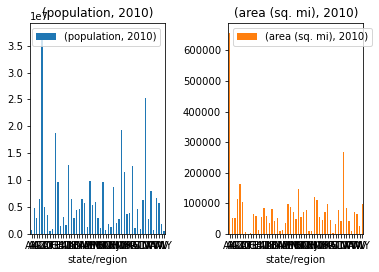

In [117]:
ax = data2010.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 35), layout=(10, 11))
plt.tight_layout()


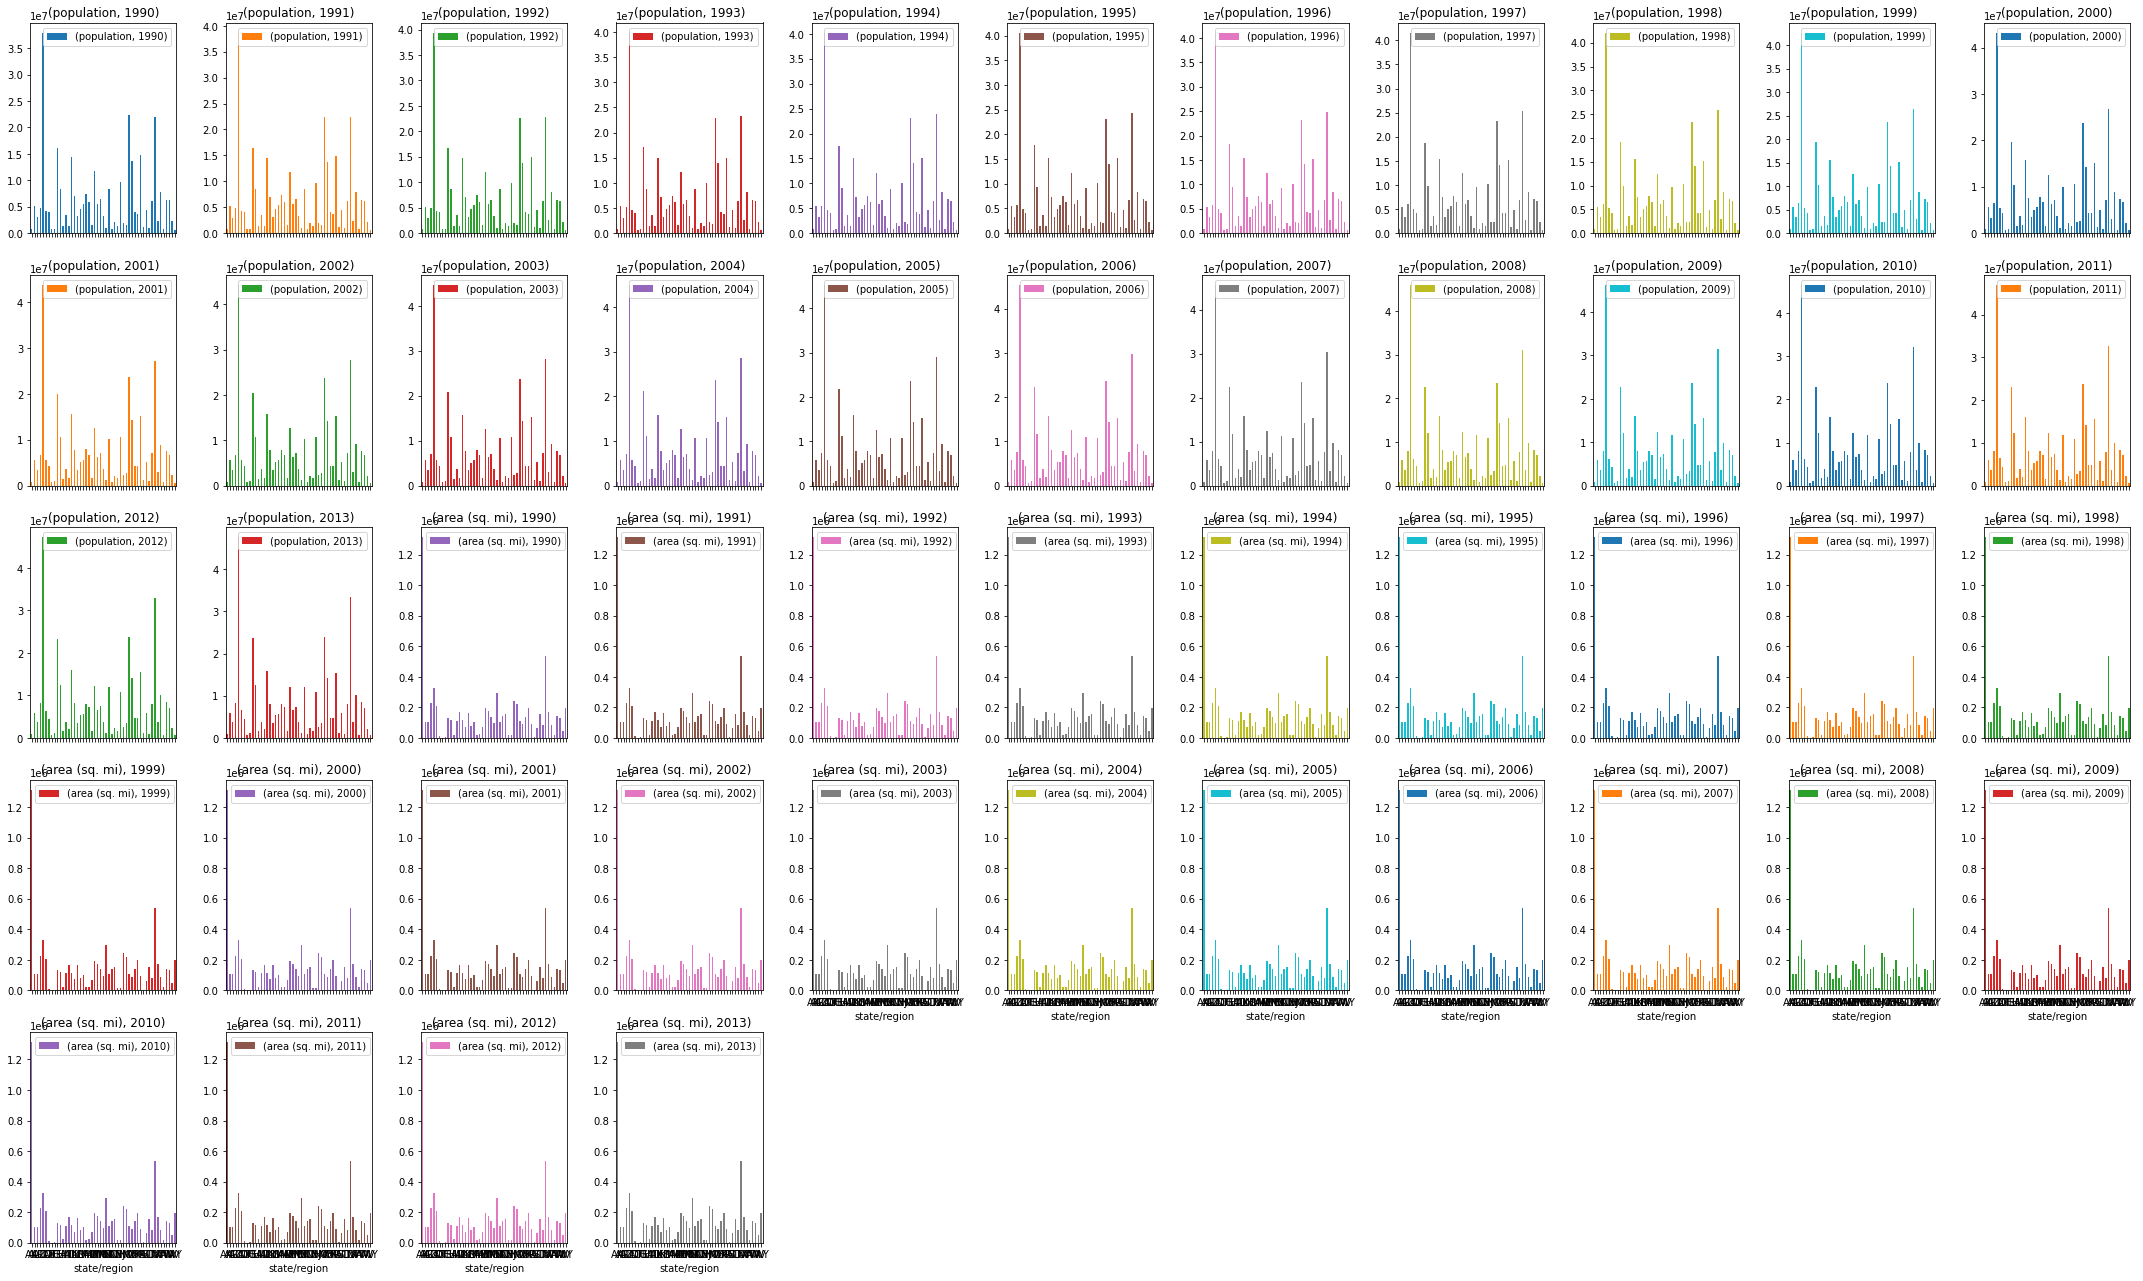

In [118]:
ax = final1.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 35), layout=(10, 11))
plt.tight_layout()

In [119]:
final1.unstack()

population                                               \
state/region         AK         AL         AR         AZ          CA   
year                                                                   
1990           730792.0  5100096.0  2977519.0  4690137.0  37940016.0   
1991           752373.0  5159950.0  3009356.0  4816861.0  38716341.0   
1992           773614.0  5226887.0  3054253.0  4971312.0  39414306.0   
1993           786624.0  5299808.0  3099777.0  5159673.0  39899738.0   
1994           790747.0  5357409.0  3147861.0  5364946.0  40274493.0   
1995           789402.0  5407353.0  3203070.0  5605890.0  40617160.0   
1996           793929.0  5443195.0  3250021.0  5802225.0  41098353.0   
1997           801248.0  5490828.0  3281294.0  5974149.0  41621369.0   
1998           812569.0  5522953.0  3309926.0  6169136.0  42150913.0   
1999           816201.0  5551428.0  3333800.0  6356219.0  42707082.0   
2000           818578.0  5574446.0  3358966.0  6534000.0  43255066.0   
2001           822485.0  5588043.0  3371177.0  6672492.0  43804924.0   
2002           830819.0  5596679.0  3384725.0  6824193.0  44236985.0   
2003           835257.0  5616574.0  3404395.0  6964035.0  44657753.0   
2004           845621.0  5644391.0  3432852.0  7136858.0  44993073.0   
2005           852250.0  5687034.0  3470884.0  7368245.0  45233508.0   
2006           860882.0  5755779.0  3519603.0  7604008.0  45392086.0   
2007           864644.0  5805136.0  3551387.0  7775576.0  45585931.0   
2008           870579.0  5853133.0  3580279.0  7909013.0  45925958.0   
2009           885246.0  5892130.0  3604729.0  7970497.0  46255730.0   
2010           901770.0  5916536.0  3634227.0  8037353.0  46617695.0   
2011           911704.0  5927390.0  3649082.0  8085149.0  46921017.0   
2012           918469.0  5935017.0  3660299.0  8168298.0  47208885.0   
2013           923264.0  5945203.0  3669239.0  8243438.0  47507398.0   

                                                                     ...  \
state/region         CO         CT        DC         DE          FL  ...   
year                                                                 ...   
1990          4189258.0  4044633.0  717953.0   835195.0  16022114.0  ...   
1991          4283656.0  4069199.0  717695.0   852990.0  16415436.0  ...   
1992          4421516.0  4077976.0  716203.0   869093.0  16770992.0  ...   
1993          4561540.0  4099924.0  715773.0   883294.0  17141251.0  ...   
1994          4690580.0  4117352.0  711410.0   898378.0  17539331.0  ...   
1995          4810963.0  4132767.0  704139.0   911471.0  17904343.0  ...   
1996          4923918.0  4148540.0  693589.0   924999.0  18285055.0  ...   
1997          5048850.0  4163721.0  687270.0   938094.0  18688573.0  ...   
1998          5176705.0  4189952.0  679071.0   952637.0  19044120.0  ...   
1999          5309956.0  4221055.0  685223.0   967500.0  19371132.0  ...   
2000          5433597.0  4254019.0  686549.0   981287.0  19702395.0  ...   
2001          5552334.0  4278685.0  689129.0   991737.0  20071405.0  ...   
2002          5628679.0  4307626.0  686980.0  1003115.0  20463994.0  ...   
2003          5673329.0  4335451.0  679905.0  1016048.0  20824961.0  ...   
2004          5721382.0  4345073.0  677510.0  1030434.0  21306052.0  ...   
2005          5788287.0  4350990.0  674323.0  1047138.0  21810216.0  ...   
2006          5892255.0  4356832.0  676332.0  1062997.0  22189902.0  ...   
2007          5993302.0  4360754.0  678530.0  1076904.0  22398940.0  ...   
2008          6093019.0  4372205.0  682493.0  1089990.0  22545677.0  ...   
2009          6189408.0  4382646.0  694326.0  1097943.0  22649927.0  ...   
2010          6274815.0  4393397.0  706434.0  1105189.0  22845586.0  ...   
2011          6348578.0  4394057.0  723530.0  1112786.0  23086032.0  ...   
2012          6422322.0  4386724.0  741069.0  1121639.0  23333170.0  ...   
2013          6506299.0  4381646.0  757923.0  1129307.0  23579534.0  ...   

             ar

In [120]:
data2010.stack()

year  state/region               
2010  AK            population        713868.0
                    area (sq. mi)     656425.0
      AL            population       4785570.0
                    area (sq. mi)      52423.0
      AR            population       2922280.0
                                       ...    
      WI            area (sq. mi)      65503.0
      WV            population       1854146.0
                    area (sq. mi)      24231.0
      WY            population        564222.0
                    area (sq. mi)      97818.0
Length: 102, dtype: float64

In [121]:
#TITANIC DATA VISUALIZATION 

In [122]:
import numpy as np 
import pandas as pd 
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [123]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [124]:
names = titanic.columns.tolist()

In [125]:
titanic.rename(columns = {'sex':'gender'}, inplace = True)


In [126]:
titanic

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [127]:
 titanic.groupby('gender')[['survived']].mean()

,survived
gender,
female,0.742038
male,0.188908


In [128]:
titanic.groupby(['gender', 'class'])['survived'].aggregate('mean')

gender  class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [129]:
titanic.groupby(['gender', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [130]:
 titanic.pivot_table('survived', index='gender', columns='class')

class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [131]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [132]:
titanic.pivot_table('survived', ['gender', age], 'class')

class               First    Second     Third
gender age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [133]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [134]:
titanic.pivot_table('survived', ['gender', age], 'class')

class               First    Second     Third
gender age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [144]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'd', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)}, 
columns = ['key', 'data1', 'data2'])

In [137]:
rng

RandomState(MT19937) at 0x1FF52076B40

In [145]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,d,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [141]:
df.stack()


0  key      A
   data1    0
   data2    5
1  key      B
   data1    1
   data2    0
2  key      d
   data1    2
   data2    3
3  key      A
   data1    3
   data2    3
4  key      B
   data1    4
   data2    7
5  key      C
   data1    5
   data2    9
dtype: object

In [142]:
df.unstack()

key    0    A
       1    B
       2    d
       3    A
       4    B
       5    C
data1  0    0
       1    1
       2    2
       3    3
       4    4
       5    5
data2  0    5
       1    0
       2    3
       3    3
       4    7
       5    9
dtype: object

In [143]:
df.unstack()

key    0    A
       1    B
       2    d
       3    A
       4    B
       5    C
data1  0    0
       1    1
       2    2
       3    3
       4    4
       5    5
data2  0    5
       1    0
       2    3
       3    3
       4    7
       5    9
dtype: object

In [147]:
df1=df.groupby('key').aggregate(['min', np.median, max])

In [148]:
df1.unstack()

               key
data1  min     A      0.0
               B      1.0
               C      5.0
               d      2.0
       median  A      1.5
               B      2.5
               C      5.0
               d      2.0
       max     A      3.0
               B      4.0
               C      5.0
               d      2.0
data2  min     A      3.0
               B      0.0
               C      9.0
               d      3.0
       median  A      4.0
               B      3.5
               C      9.0
               d      3.0
       max     A      5.0
               B      7.0
               C      9.0
               d      3.0
dtype: float64

In [149]:
df1.stack()

data1  data2
key                     
A   min       0.0    3.0
    median    1.5    4.0
    max       3.0    5.0
B   min       1.0    0.0
    median    2.5    3.5
    max       4.0    7.0
C   min       5.0    9.0
    median    5.0    9.0
    max       5.0    9.0
d   min       2.0    3.0
    median    2.0    3.0
    max       2.0    3.0